# Requesting seasonal forecasts/hindcast from C3S
### get API key
Instructions: https://cds.climate.copernicus.eu/api-how-to

### Build an example playground request
https://cds.climate.copernicus.eu/cdsapp#!/dataset/seasonal-original-single-levels?tab=form

### Agree to product licenses
https://cds-clone.copernicus-climate.eu/cdsapp/#!/terms/Additional-licence-to-use-non-European-contributions
https://cds-clone.copernicus-climate.eu/cdsapp/#!/terms/Additional-licence-to-use-non-European-contributions

Can be accepted at the bottom of https://cds.climate.copernicus.eu/cdsapp#!/dataset/seasonal-original-single-levels?tab=form while logged in with your credentials https://cds.climate.copernicus.eu/cdsapp#!/dataset/seasonal-original-single-levels?tab=form

In [ ]:
import cdsapi
from pathlib import Path

c = cdsapi.Client()

leadtime_range = list(range(0,24*180,6)) # every 6 hours for 180 days

variables = ['2m_temperature', 'surface_latent_heat_flux',
             'surface_net_solar_radiation','mean_sea_level_pressure', 'evaporation',
            'surface_sensible_heat_flux','total_precipitation']

years = ['2017', '2018', '2019','2020','2021']

download_dir = '/mnt/d/ecmwf/'

for year in years:
    for variable in variables:
        
        file_path = Path(download_dir+f'ecmwf_{year}_{variable}.grib')
        if file_path.is_file():
            print(f"Skipping ecmwf_{year}_{variable}.grib, file found!")
            continue
            
        print(f"Downloading ecmwf_{year}_{variable}.grib")
        try:
            c.retrieve(
                'seasonal-original-single-levels',
                {
                    'format': 'grib',
                    'originating_centre': 'ecmwf',
                    'system': '5',
                    'variable': str(variable),
                    'year': str(year),
                    'month': [
                        '01', '02', '03',
                        '04', '05', '06',
                        '07', '08', '09',
                        '10', '11', '12',
                        ],
                    'day': '01',
                    'leadtime_hour': leadtime_range,
                    'area': [ 40, -25, -40, 55,], # Coarsely Africa
                },
                file_path)
        except:
            pass

Skipping ecmwf_2017_2m_temperature.grib, file found!
Skipping ecmwf_2017_surface_latent_heat_flux.grib, file found!
Skipping ecmwf_2017_surface_net_solar_radiation.grib, file found!
Skipping ecmwf_2017_mean_sea_level_pressure.grib, file found!
Skipping ecmwf_2017_evaporation.grib, file found!
Skipping ecmwf_2017_surface_sensible_heat_flux.grib, file found!
Skipping ecmwf_2017_total_precipitation.grib, file found!
Skipping ecmwf_2018_2m_temperature.grib, file found!
Skipping ecmwf_2018_surface_latent_heat_flux.grib, file found!
Skipping ecmwf_2018_surface_net_solar_radiation.grib, file found!
Skipping ecmwf_2018_mean_sea_level_pressure.grib, file found!
Skipping ecmwf_2018_evaporation.grib, file found!
Skipping ecmwf_2018_surface_sensible_heat_flux.grib, file found!
Skipping ecmwf_2018_total_precipitation.grib, file found!
Skipping ecmwf_2019_2m_temperature.grib, file found!


2022-04-19 11:38:27,873 INFO Welcome to the CDS
2022-04-19 11:38:27,874 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-original-single-levels
2022-04-19 11:38:28,000 INFO Request is queued
2022-04-19 11:38:29,040 INFO Request is running
2022-04-19 11:54:41,529 INFO Request is completed
2022-04-19 11:54:41,530 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data2/adaptor.mars.external-1650361110.1128297-22565-14-2c0d1cde-5fa3-49d3-a204-d30d0fb345d9.grib to /mnt/d/ecmwf/ecmwf_2019_surface_latent_heat_flux.grib (1.4G)
  3%|█████▌                                                                                                                                                                                                             | 36.4M/1.36G [00:49<23:05, 1.03MB/s]


# TODO: Build a .zarr and use as a provider for earthnet-minicuber

In [1]:
import argparse
import cdsapi

import xarray as xr
import cfgrib
import numpy as np

import zarr
from numcodecs import Blosc
from tqdm import tqdm

from pathlib import Path

In [2]:
download_dir = '/mnt/d/ecmwf_2017/'
#download_dir to args.outpath

In [3]:
t2m_2017 = xr.open_dataset('/mnt/d/ecmwf/ecmwf_2017_2m_temperature.grib', chunks = {"number": 1, "time": 1,"latitude": 20, "longitude": 20, "time": 4*180}).rename({"latitude": "lat", "longitude": "lon"})

In [ ]:
ecmwf = xr.merge([xr.open_dataset(gribpath, chunks = {"number":1,"time":1,"latitude": 20, "longitude": 20, "time": 4*180}).rename({"latitude": "lat", "longitude": "lon"}) for gribpath in Path('/mnt/d/ecmwf/').glob("*temperature.grib")])

/home/crequ/anaconda3/envs/HS_UC1/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/crequ/anaconda3/envs/HS_UC1/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/h

In [5]:
import yaml
with open('coords.yml', 'w') as outfile:
    yaml.dump(dict(ecmwf.coords), outfile, default_flow_style=False)
dict(ecmwf.coords)

{'number': <xarray.DataArray 'number' (number: 51)>
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])
 Coordinates:
   * number   (number) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
     surface  float64 ...
 Attributes:
     long_name:      ensemble member numerical id
     units:          1
     standard_name:  realization,
 'time': <xarray.DataArray 'time' (time: 12)>
 array(['2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
        '2017-03-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
        '2017-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
        '2017-07-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
        '2017-09-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
        '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.0

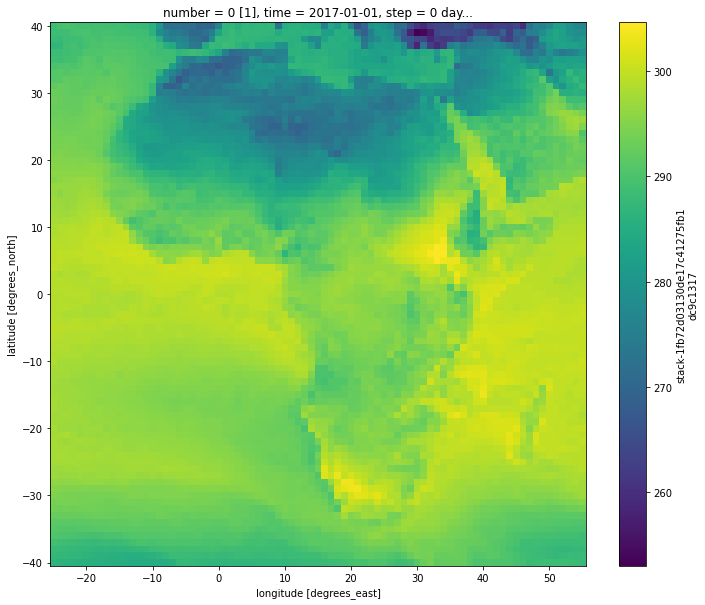

In [12]:
(t2m_2017.to_array("band").isel(time = 0, number = 0, step = 0)).plot(figsize=(12,10))

In [ ]:
t2m_2017[["t2m"]].to_array("band").plot(hue = "band")

In [16]:
ecmwf = xr.merge([xr.open_dataset(gribpath, chunks = {"latitude": 20, "longitude": 20, "time": 4*180}).rename({"latitude": "lat", "longitude": "lon"}) for gribpath in Path(download_dir).glob("*.grib")])

Ignoring index file '/mnt/d/ecmwf_2017/ecmwf_2017_2m_temperature.grib.923a8.idx' incompatible with GRIB file
/home/crequ/anaconda3/envs/HS_UC1/lib/python3.9/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [1]:
print(ecmwf)

NameError: name 'ecmwf' is not defined

# More info on this data:
https://www.ecmwf.int/en/forecasts/datasets/set-v


https://confluence.ecmwf.int/display/CKB/Parameters+GRIB+encoding+details

Vars (ECMWF SEAS5) https://confluence.ecmwf.int/display/CKB/Detailed+list+of+parameters

In [19]:
ds = xr.Dataset(coords = dict(ecmwf.coords))
ds = ds.chunk(chunks={"step":4*180, "number":1,"time": 1, "lat": 20, "lon": 20})

In [20]:
outpath = '/mnt/d/ecmwf/zarr'
zarrpath = str(Path(outpath)/"ecmwf_africa_0d1_6hourly.zarr")

In [25]:
ds.to_zarr(zarrpath)

In [26]:
zarrgroup = zarr.open_group(zarrpath)
compressor = Blosc(cname='lz4', clevel=1)

In [27]:
SHORT_NAMES = {
    't2m': '2m_temperature', 
    'e': 'evaporation', 
}

years = ['2017']
SHORT_NAMES_INV = {v: k for k,v in SHORT_NAMES.items()}
    
for var in list(SHORT_NAMES.keys()):
        newds = zarrgroup.create_dataset(var, shape = (len(ecmwf.number.values), len(ecmwf.time.values), len(ecmwf.step.values), len(ecmwf.lat.values), len(ecmwf.lon.values)), chunks = (1, 1, 4*180,20, 20), dtype = 'float32', fillvalue = np.nan, compressor = compressor)
        newds.attrs['_ARRAY_DIMENSIONS'] = ("number","time", "step","lat", "lon")

In [ ]:
subdaily_vars = ['2m_temperature', 'mean_sea_level_pressure']

for year_idx in range(len(years)):
        for var in tqdm((SHORT_NAMES.keys())):
            if var in subdaily_vars:
                idxs = list(range(0,180*4-1,1))
            else:
                idxs = list(range(-1,180*4-1,4))[1:]
                        
            yearvar = xr.open_dataset(str(Path(download_dir)/f"ecmwf_{years[year_idx]}_{SHORT_NAMES[var]}.grib"))
            zarrgroup[var][:,year_idx*12:year_idx*12+12,idxs,:,:] = yearvar['t2m'].values

  0%|                                                                                                                                                                                                                                  | 0/2 [00:00<?, ?it/s]Ignoring index file '/mnt/d/ecmwf_2017/ecmwf_2017_2m_temperature.grib.923a8.idx' incompatible with GRIB file
